In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [3]:
df=pd.read_csv("loan_approval_data.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        950 non-null    float64
 1   Applicant_Income    950 non-null    float64
 2   Coapplicant_Income  950 non-null    float64
 3   Employment_Status   950 non-null    object 
 4   Age                 950 non-null    float64
 5   Marital_Status      950 non-null    object 
 6   Dependents          950 non-null    float64
 7   Credit_Score        950 non-null    float64
 8   Existing_Loans      950 non-null    float64
 9   DTI_Ratio           950 non-null    float64
 10  Savings             950 non-null    float64
 11  Collateral_Value    950 non-null    float64
 12  Loan_Amount         950 non-null    float64
 13  Loan_Term           950 non-null    float64
 14  Loan_Purpose        950 non-null    object 
 15  Property_Area       950 non-null    object 
 16  Educati

#Handle Missing Values

In [4]:
categorical_cols=df.select_dtypes(include=["object"]).columns   #seperating the colums which hava datatype object
numerical_cols=df.select_dtypes(include=["float64"]).columns  #seperating the columns which have the datatype float64
categorical_cols

Index(['Employment_Status', 'Marital_Status', 'Loan_Purpose', 'Property_Area',
       'Education_Level', 'Gender', 'Employer_Category', 'Loan_Approved'],
      dtype='object')

In [7]:
#imputer is used to complete the incomplete values with simple strategies

from sklearn.impute import SimpleImputer
num_imp=SimpleImputer(strategy="mean")
df[numerical_cols]=num_imp.fit_transform(df[numerical_cols])

categorical_imp=SimpleImputer(strategy="most_frequent")
df[categorical_cols]=categorical_imp.fit_transform(df[categorical_cols])

df.head()
df.isnull().sum()

Applicant_ID          0
Applicant_Income      0
Coapplicant_Income    0
Employment_Status     0
Age                   0
Marital_Status        0
Dependents            0
Credit_Score          0
Existing_Loans        0
DTI_Ratio             0
Savings               0
Collateral_Value      0
Loan_Amount           0
Loan_Term             0
Loan_Purpose          0
Property_Area         0
Education_Level       0
Gender                0
Employer_Category     0
Loan_Approved         0
dtype: int64

EDA-exploratory data amalysis

Text(0.5, 1.0, 'Is loan approved or not?')

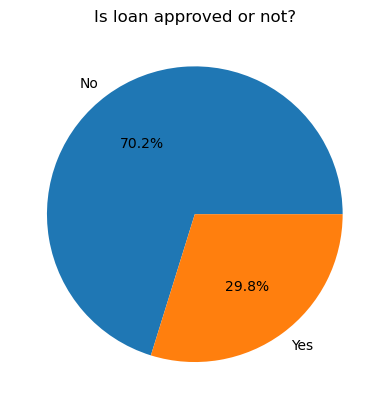

In [16]:
#how balamced our classese are ?
classes_count=df["Loan_Approved"].value_counts()
plt.pie(classes_count,labels=["No","Yes"],autopct="%1.1f%%")
plt.title("Is loan approved or not?")

[Text(0, 0, '621'), Text(0, 0, '379')]

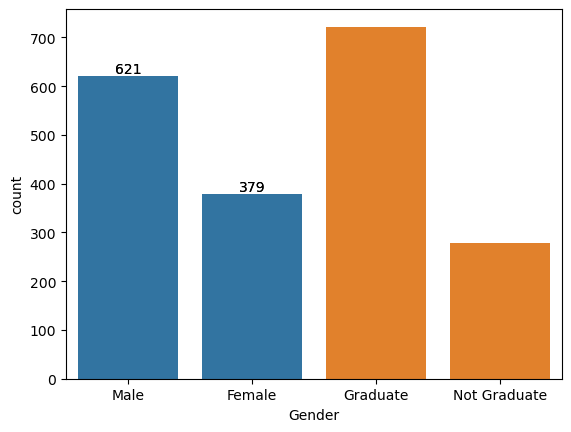

In [20]:
#analyze the categories
gender_cnt=df['Gender'].value_counts()
ax=sns.barplot(gender_cnt)
ax.bar_label(ax.containers[0])


edu_count=df['Education_Level'].value_counts()
ax=sns.barplot(edu_count)
ax.bar_label(ax.containers[0])

<Axes: xlabel='Applicant_Income', ylabel='Count'>

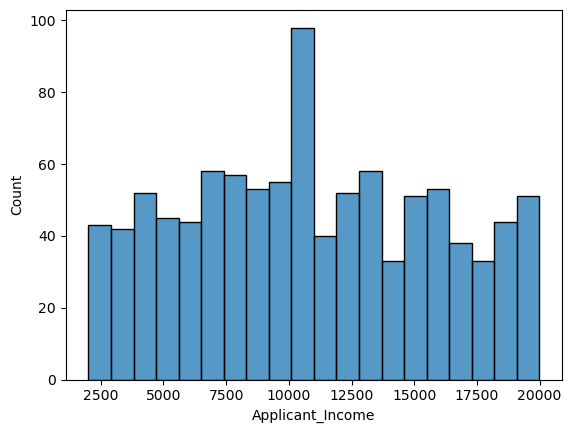

In [23]:
#analyze the histogram

sns.histplot(
    data=df,
    x="Applicant_Income",
    bins=20
)


<Axes: xlabel='Coapplicant_Income', ylabel='Count'>

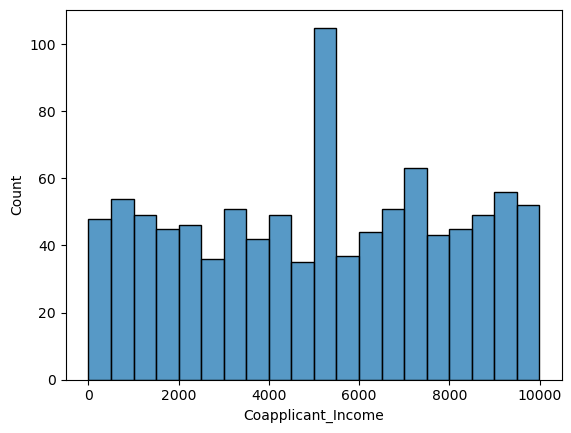

In [24]:
sns.histplot(
    data=df,
    x="Coapplicant_Income",
    bins=20
)


<Axes: xlabel='Loan_Approved', ylabel='Applicant_Income'>

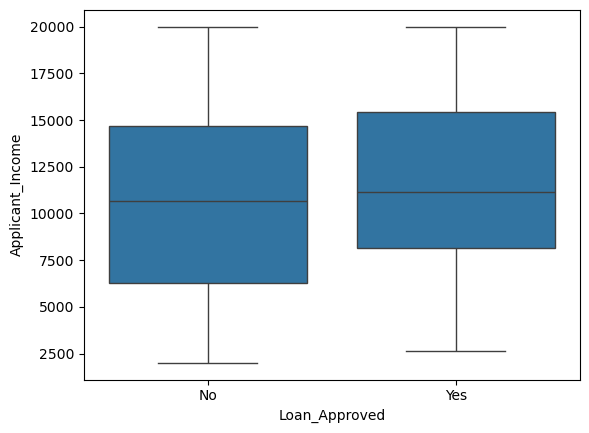

In [25]:
#outliers-box plots
sns.boxplot(
    data=df,
    x="Loan_Approved",
    y="Applicant_Income"
)
    

<Axes: xlabel='Loan_Approved', ylabel='Savings'>

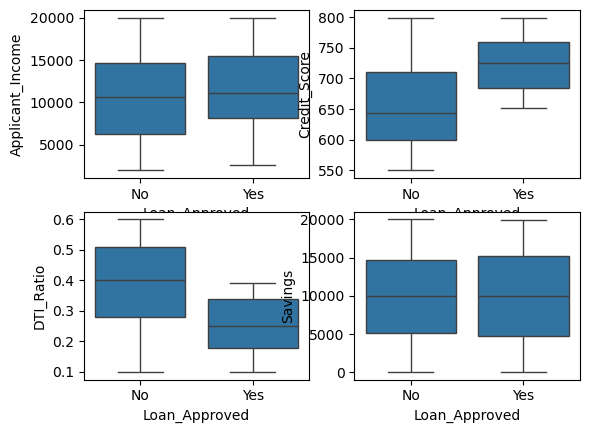

In [26]:
fig,axes=plt.subplots(2,2)
sns.boxplot(ax=axes[0,0],data=df,x="Loan_Approved",y="Applicant_Income")
sns.boxplot(ax=axes[0,1],data=df,x="Loan_Approved",y="Credit_Score")
sns.boxplot(ax=axes[1,0],data=df,x="Loan_Approved",y="DTI_Ratio")
sns.boxplot(ax=axes[1,1],data=df,x="Loan_Approved",y="Savings")

<Axes: xlabel='Credit_Score', ylabel='Count'>

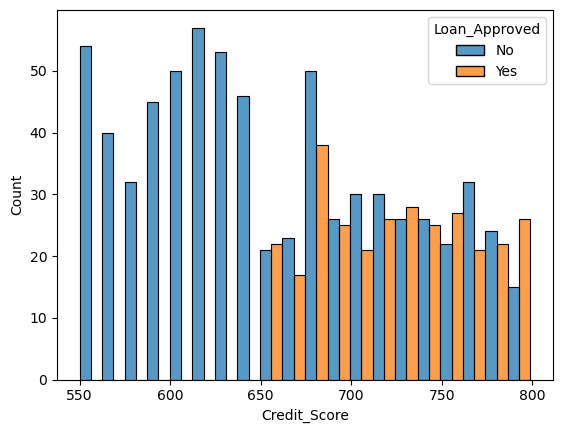

In [29]:
#credit score with loan approved
sns.histplot(
    data=df,
    x="Credit_Score",
    hue="Loan_Approved",
    multiple="dodge",
    bins=20)

<Axes: xlabel='Applicant_Income', ylabel='Count'>

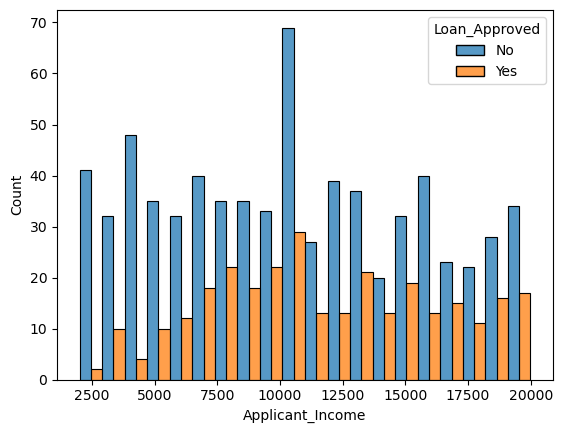

In [30]:
#income with loan approved
sns.histplot(
    data=df,
    x="Applicant_Income",
    hue="Loan_Approved",
    multiple="dodge",
    bins=20)

In [34]:
#remove the applicant id
#df=df.drop("Applicant_ID",axis=1)
df.head()
df.isnull().sum()

Applicant_Income      0
Coapplicant_Income    0
Employment_Status     0
Age                   0
Marital_Status        0
Dependents            0
Credit_Score          0
Existing_Loans        0
DTI_Ratio             0
Savings               0
Collateral_Value      0
Loan_Amount           0
Loan_Term             0
Loan_Purpose          0
Property_Area         0
Education_Level       0
Gender                0
Employer_Category     0
Loan_Approved         0
dtype: int64

Encoding


In [40]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

le=LabelEncoder()
df["Education_Level"]=le.fit_transform(df["Education_Level"])
df["Loan_Approved"]=le.fit_transform(df["Loan_Approved"])
df.head()

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,1,Female,Private,0
1,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,0,Male,Private,0
2,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,0,Female,Government,1
3,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,0,Female,Government,0
4,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,0,Male,Private,1


In [ ]:
cols=["Education_Level","Marital_Status","Loan_Purpose","Property_Area","Gender","Employer_Category"]
ohe=OneHotEncoder(drop="first",sparse_output=False,handle_unknown="ignore")
encoded=ohe.fit_transform(df[cols])
encoded_df=pd.DataFrame(encoded,columns=ohe.get_feature_names_out(cols),index=df.index)

df=pd.concat([df.drop(columns=cols),encoded_df],axis=1)

In [65]:
encoded_df.head()

,Education_Level_1,Marital_Status_Single,Loan_Purpose_Car,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


Correlation Heatmap

<Axes: >

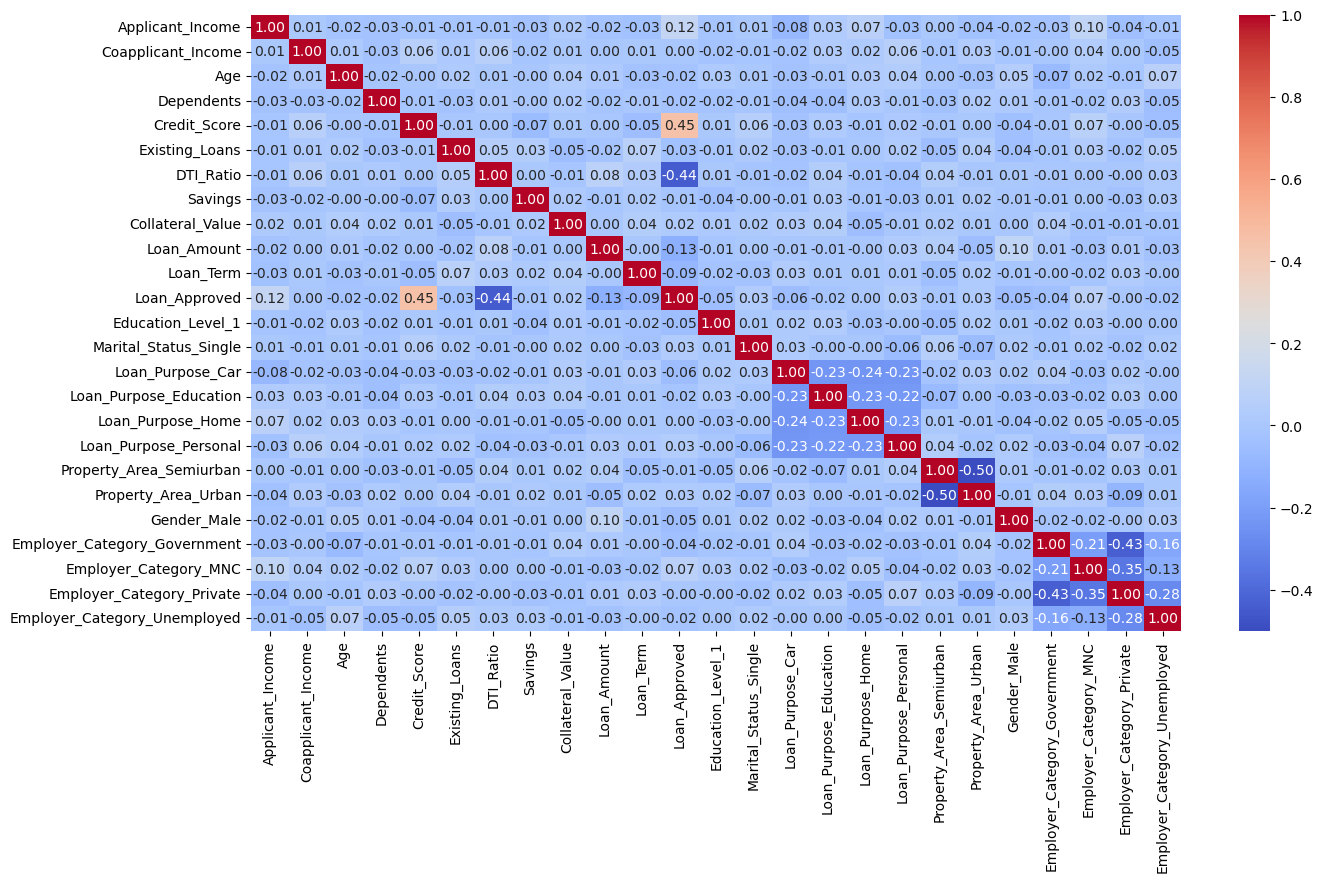

In [70]:
nums_cols=df.select_dtypes(include="number")
corr_matrix=nums_cols.corr()
plt.figure(figsize=(15,8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)

In [69]:
nums_cols.corr()["Loan_Approved"].sort_values(ascending=False)

Loan_Approved                   1.000000
Credit_Score                    0.451175
Applicant_Income                0.119796
Employer_Category_MNC           0.069049
Loan_Purpose_Personal           0.034043
Marital_Status_Single           0.030182
Property_Area_Urban             0.025963
Collateral_Value                0.021868
Coapplicant_Income              0.004230
Loan_Purpose_Home               0.002118
Employer_Category_Private      -0.003347
Property_Area_Semiurban        -0.012967
Savings                        -0.013437
Loan_Purpose_Education         -0.016684
Employer_Category_Unemployed   -0.021468
Age                            -0.022343
Dependents                     -0.023811
Existing_Loans                 -0.034794
Employer_Category_Government   -0.039187
Education_Level_1              -0.052920
Gender_Male                    -0.054342
Loan_Purpose_Car               -0.056416
Loan_Term                      -0.086644
Loan_Amount                    -0.126499
DTI_Ratio       

Train-Test-Split+Feature Scaling

In [80]:
x=df.drop(["Loan_Approved","Employment_Status"],axis=1)
y=df["Loan_Approved"]
x.head()

,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,...,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
0,17795.0,1387.0,51.0,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2860.0,2679.0,46.0,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,7390.0,2106.0,25.0,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,13964.0,8173.0,40.0,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,13284.0,4223.0,31.0,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_test.head()

,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,...,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
521,13023.0,6675.0,53.000000,3.0,628.0,3.0,0.347263,10051.000000,26309.0,22947.000000,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
737,15917.0,6787.0,42.000000,0.0,588.0,4.0,0.410000,922.000000,13476.0,20522.825263,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
740,7560.0,3530.0,52.000000,3.0,606.0,0.0,0.580000,9940.452632,21795.0,5876.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
660,19022.0,574.0,59.000000,0.0,725.0,4.0,0.410000,1463.000000,44498.0,8433.000000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
411,4967.0,5797.0,39.971579,3.0,697.0,4.0,0.580000,1095.000000,3017.0,33926.000000,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0


In [85]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

In [86]:
x_train_scaled

array([[-1.01234556e+00,  1.02716377e+00, -8.22511453e-01, ...,
        -4.13887756e-01, -8.59726954e-01, -3.07231582e-01],
       [-1.23639141e+00, -1.59187898e+00,  9.15886794e-01, ...,
        -4.13887756e-01, -8.59726954e-01, -3.07231582e-01],
       [-1.15862490e-02,  1.33606578e+00, -3.65038230e-01, ...,
        -4.13887756e-01,  1.16316000e+00, -3.07231582e-01],
       ...,
       [-2.27277589e-01,  3.50089621e-01, -8.22511453e-01, ...,
        -4.13887756e-01,  1.16316000e+00, -3.07231582e-01],
       [ 1.12970221e+00, -4.64700438e-01,  1.19037073e+00, ...,
        -4.13887756e-01, -8.59726954e-01, -3.07231582e-01],
       [-1.75526629e+00,  1.43417276e-02,  9.40348249e-04, ...,
         2.41611400e+00, -8.59726954e-01, -3.07231582e-01]],
      shape=(800, 24))